## Observations and Insights 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
%matplotlib inline 
#I found that the magic key displayed on the previouse code line is great to include inside the code to allow it to run properly on jupyter lab. I got this form the following videos URL:https://www.linkedin.com/learning/pandas-essential-training/basic-plotting?u=38416468
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Check that the df are read and displayed with a print statment 
#mouse_metadata.head()
#study_results.head()

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on ="Mouse ID")

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
mice_count = merge_df["Timepoint"].value_counts()[0]
print(f'There are a total of {mice_count} in this data set')

There are a total of 250 in this data set


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_values = merge_df[merge_df.duplicated()]
#I understood the .duplicated() funciton thanks to this website: https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/#:~:text=To%20find%20%26%20select%20the%20duplicate,argument%20is%20'first').
duplicated_values

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
Duplicated_Mouse = merge_df.loc[merge_df['Mouse ID'] == 'g989']
Duplicated_Mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
index_name= merge_df[merge_df['Mouse ID']=='g989'].index
#index_names.head()
df = merge_df.drop(index_name)
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_df_mice_count = df["Timepoint"].value_counts()[0]
print(f'There are a total of {clean_df_mice_count} in the clean dataframe, no duplicated values are in here!')

There are a total of 248 in the clean dataframe, no duplicated values are in here!


In [10]:
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
median = df.groupby('Drug Regimen').median() ["Tumor Volume (mm3)"]
variance = df.groupby('Drug Regimen').var() ["Tumor Volume (mm3)"]
standar_deviation = df.groupby('Drug Regimen').std() ["Tumor Volume (mm3)"]
sem = df.groupby('Drug Regimen').sem() ["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary dataframe.
summary_statistics_table = pd.DataFrame({"Mean": mean,
                                        "Median": median,
                                        "Variance": variance,
                                        "Standar Deviation": standar_deviation,
                                        "SEM": sem})
summary_statistics_table


,Mean,Median,Variance,Standar Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_df = df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median','var', 'std', 'sem' ]})
summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [13]:
mouse= df['Mouse ID'].unique()
#list(mouse)

In [14]:
#Get the unique number of mice per drug regimen
unique_mice_per_drug_regimen = df.groupby('Drug Regimen')['Mouse ID'].nunique()
unique_mice_per_drug_regimen


Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

In [15]:
#Create a df from the series created for unique values of frug regimen and mice count (unique)
unique_mice_df = unique_mice_per_drug_regimen.to_frame()
unique_mice_df
#Got this from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.to_frame.html

,Mouse ID
Drug Regimen,
Capomulin,25
Ceftamin,25
Infubinol,25
Ketapril,25
Naftisol,25
Placebo,25
Propriva,24
Ramicane,25
Stelasyn,24


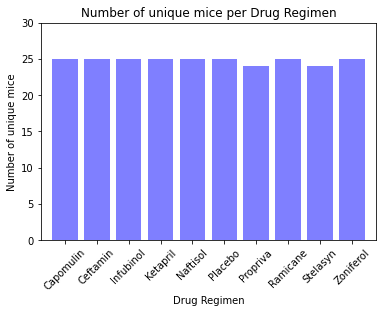

<Figure size 1440x216 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [30]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
mice = unique_mice_df['Mouse ID']
x_axis= np.arange(len(mice))
plt.bar(x_axis, mice, color='b', alpha=0.5, align='center');
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol'], rotation=45)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0,max(mice)+5)
plt.title("Number of unique mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of unique mice")
plt.figure(figsize=(20,3))
plt.show()
plt.tight_layout()


In [17]:
mice_group=df.groupby('Drug Regimen')
count_mice = mice_group['Mouse ID'].nunique()
count_mice

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

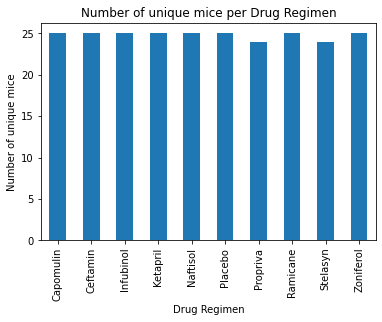

<Figure size 432x288 with 0 Axes>

In [31]:
count_chart=count_mice.plot(kind='bar', title="Number of unique mice per Drug Regimen")
count_chart.set_xlabel('Drug Regimen')
count_chart.set_ylabel('Number of unique mice')
plt.show()
plt.tight_layout()

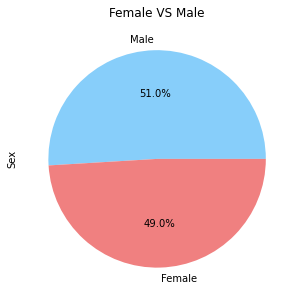

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender= df['Sex'].value_counts()
gender
sizes = [958,922]
colors = ['Cyan','pink']
gender.plot(kind='pie',colors=["lightskyblue","lightcoral"], figsize=(5,5), autopct="%1.1f%%", title="Female VS Male");




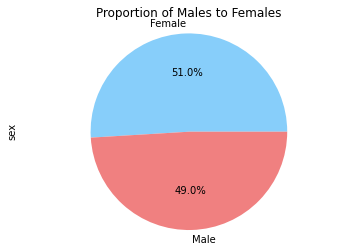

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex=["Female",'Male']
plt.pie(gender, colors=["lightskyblue","lightcoral"], labels=sex, autopct="%1.1f%%", startangle=0)
plt.ylabel ('sex')
plt.title("Proportion of Males to Females")
#plt.legend()
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots (Tutoring Sesion)


In [67]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
top4 = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

top4_df=df['Drug Regimen'].isin(top4) #tutoring with Trent Littel we went over this method and I was able to understand and move foward to get that last timepoint on the next few lines of code

filtered_df = df[top4_df]

timepoint_df = filtered_df.drop_duplicates(subset = 'Mouse ID', keep='last')
timepoint_df

timepoint_df.drop(columns='Tumor volume at the last timepoint') #I had created this column at one point in the data frame and I had to drop it as it was of no help or need.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
